
# Goal
The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.
# Metric
This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

# Submission File Format
The file should contain a header and have the following format:

ImageId,Label
* 1,0
* 2,0
* 3,0
* etc.


<a id="数据集"></a> <br>
# 数据集概览
* 在本教程中，我们将使用“手语数字数据集”。
* 该数据集中包含2062张手语数字图片。
* 数字范围是从0到9。因此共有10个不同的手势。
* 为了简化起见，我们仅使用手势0和1。
* 准备我们的X和Y数组。X是图像数组（手势零和一手势），Y是标签数组（0和1）。

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
# 先用pandas读入csv
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv')
Y_test = df.iloc[:, 0].values   # 标签数据
X_test = df.iloc[:, 1:].values  # 特征数据
np.save("X.npy", X_test)
np.save("Y.npy", Y_test)
X_train = np.load('X.npy')
Y_train = np.load('Y.npy')

z_test = pd.read_csv('test.csv')
np.save("Z.npy", z_test)
z_test_train = np.load('Z.npy')

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

print("数据形状:", X_train.shape) 
print("数据形状:", Y_train.shape) 
print("数据形状:", X_test.shape) 
print("数据形状:", Y_test.shape) 
print("数据形状:", z_test.shape) 



数据形状: (42000, 784)
数据形状: (42000,)
数据形状: (42000, 784)
数据形状: (42000,)
数据形状: (28000, 784)


数据形状: (42000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
数据形状: (42000,)
[1 0 1 4 0 0 7 3 5 3]


(-0.5, 27.5, 27.5, -0.5)

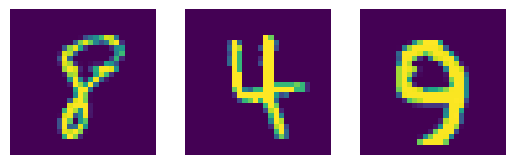

In [3]:
# load data set
img_size = 28
dataX = np.load('X.npy') # 查看数据形状
print("数据形状:", dataX.shape) # 打印前五行数据 
print(dataX[:10])
dataY = np.load('Y.npy') # 查看数据形状
print("数据形状:", dataY.shape) # 打印前五行数据

print(dataY[:10])

plt.subplot(1, 3, 1)
plt.imshow(dataX[290].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dataX[950].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dataX[1560].reshape(img_size, img_size))
plt.axis('off')

* 为手势零的图像创建标签数组，其值为0，为一手势的图像创建标签数组，其值为1

In [4]:
Y_test = Y_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
print("Y_test shape: ", Y_test.shape)
print("Y_train shape: ", Y_train.shape)
print("X_shape: " , X_train.shape)
print("Y_shape: " , Y_train.shape)
print("X_test shape: " , X_test.shape)
print("Y_test shape: " , Y_test.shape)

Y_test shape:  (42000, 1)
Y_train shape:  (42000, 1)
X_shape:  (42000, 784)
Y_shape:  (42000, 1)
X_test shape:  (42000, 784)
Y_test shape:  (42000, 1)


In [5]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print("X_train number: " , number_of_train)
print("X_test number: " , number_of_test)

X_train number:  35700
X_test number:  6300


* 现在我们有3维的输入数组（X），为了将其作为感知机模型的输入，我们需要将其展平为2维
* 我们的标签数组（Y）已经是展平的（2D），所以我们保持不变。
* 将X数组（图像数组）展平。


In [6]:
# X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
# X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
# print("X train flatten",X_train_flatten.shape)
# print("X test flatten",X_test_flatten.shape)

* 为方便后续矩阵乘法的计算，对样本矩阵进行转置

In [7]:
y_train = Y_train.T
y_test = Y_test.T
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train: ",Y_train.shape)
print("Y_test: ",Y_test.shape)

X_train:  (35700, 784)
X_test:  (6300, 784)
Y_train:  (35700, 1)
Y_test:  (6300, 1)


# Do Sharpen

In [8]:
import cv2
import numpy as np

# 假设你的数据已经加载到这些变量中
z_test = z_test.to_numpy() if isinstance(z_test, pd.DataFrame) else z_test
# 重新调整数据形状
X_train_reshaped = X_train.reshape((35700, 28, 28))
X_test_reshaped = X_test.reshape((6300, 28, 28))
z_test_reshaped = z_test.reshape((28000, 28, 28))

# 转换图像数据类型为 CV_8UC1
X_train_reshaped = X_train_reshaped.astype(np.uint8)
X_test_reshaped = X_test_reshaped.astype(np.uint8)
z_test_reshaped = z_test_reshaped.astype(np.uint8)

def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=5.0, threshold=0):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    return sharpened

# 对所有图像进行unsharp_mask锐化处理
X_train_sharpened = np.array([unsharp_mask(image) for image in X_train_reshaped])
X_test_sharpened = np.array([unsharp_mask(image) for image in X_test_reshaped])
z_test_sharpened = np.array([unsharp_mask(image) for image in z_test_reshaped])

# 检查锐化结果
print(X_train_sharpened.shape)  # 输出应为 (35700, 28, 28)
print(X_test_sharpened.shape)   # 输出应为 (35700, 28, 28)
print(z_test_sharpened.shape)   # 输出应为 (35700, 28, 28)





(35700, 28, 28)
(6300, 28, 28)
(28000, 28, 28)


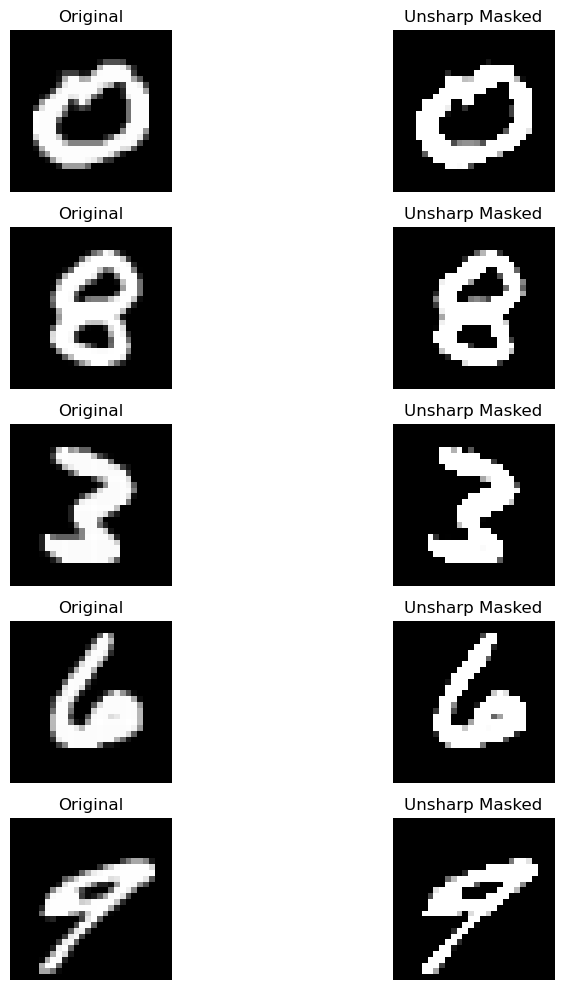

In [10]:
# 随机抽取样本的索引
num_samples = 5
random_indices = np.random.choice(X_train_reshaped.shape[0], num_samples, replace=False)
fig, axs = plt.subplots(num_samples, 2, figsize=(10, 10))

for i, idx in enumerate(random_indices):
    original_image = X_train_reshaped[idx]
    sharpened_image = unsharp_mask(original_image)

    axs[i, 0].imshow(original_image, cmap='gray')
    axs[i, 0].set_title('Original')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(sharpened_image, cmap='gray')
    axs[i, 1].set_title('Unsharp Masked')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()